# Working with Grouped Data

Cases often belong to distinct groups that we want to compare with each other in some way. 

Let's load the countries data once again:

In [1]:
import pandas as pd

In [2]:
countries = pd.read_excel("Data/data_geographies_v1.xlsx", sheet_name = "list-of-countries-etc")
countries.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


Imagine you are investigating how latitude affects skin cancer risk. Here's the overall distribution of latitudes for all countries:

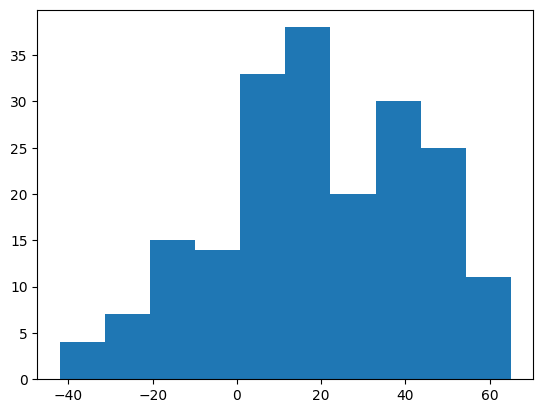

In [3]:
import matplotlib.pyplot as plt

plt.hist(countries['Latitude'])
plt.show()

You might want to summarise data collected from different regions. We can easily visualise the distributions of latitude for different subgroups of countries using a box plot:

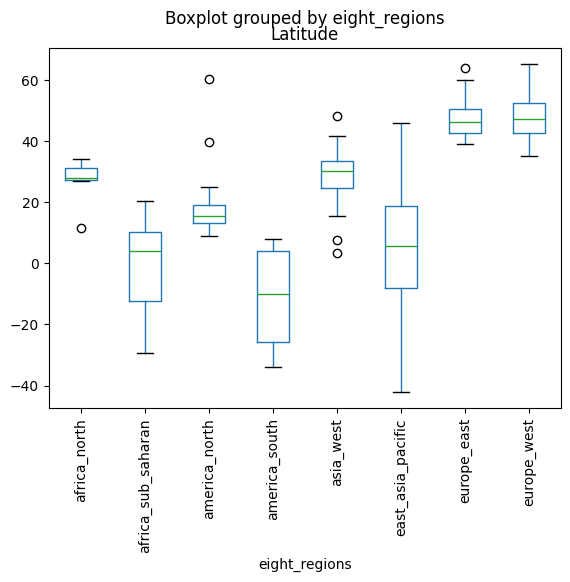

In [4]:
countries.boxplot('Latitude', by='eight_regions', grid=False, rot=90 )
plt.show()

The boxplot shows the median latitude for each group of countries.
How can we get hold of these values?

### `groupby()`

Pandas allows you to define groups of rows and construct summary statistics for each group:

In [5]:
grouped = countries.groupby("eight_regions")

In [6]:
grouped['Latitude'].median()

eight_regions
africa_north          28.000000
africa_sub_saharan     3.850000
america_north         15.500000
america_south        -10.000000
asia_west             30.000000
east_asia_pacific      5.712000
europe_east           46.041665
europe_west           47.166670
Name: Latitude, dtype: float64

#### Exercise


Find means and standard deviations of **petal_length** for the three different species of iris in the file *iris.csv*.

In [10]:
iris = pd.read_csv("Data/iris.csv")

iris_grouped = iris.groupby("species")

print(iris_grouped['petal_length'].mean())

print(iris_grouped['petal_length'].std())

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64
species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64


Plot the total global CO2 emissions for each year.


In [ ]:
co2 = pd.read_csv("Data/yearly_co2_emissions_1000_tonnes.csv")

# Same tidying as previous notebook, and then groupby year then plot


,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.0,546.0,539.0,539.0,517.0,517.0,491.0,488.0,477.0,462.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19200.0,22300.0,25200.0,25700.0,27800.0,29100.0,30300.0,33400.0,32600.0,34800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,165000.0,170000.0,161000.0,179000.0,180000.0,189000.0,177000.0,199000.0,184000.0,185000.0
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98100.0,103000.0,105000.0,118000.0,129000.0,143000.0,152000.0,142000.0,147000.0,167000.0
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20000.0,21300.0,21000.0,22300.0,24600.0,23400.0,19700.0,18700.0,25500.0,22700.0
190,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2290.0,2290.0,1930.0,2170.0,2510.0,2690.0,2940.0,3670.0,3960.0,4500.0


***